In [3]:
import yaml
import torch

from roadvision3d.src.engine.model_builder import build_model
from roadvision3d.src.engine.model_saver import load_checkpoint
from roadvision3d.tools.inference import inference, process_image
from roadvision3d.src.datasets.object_3d import Calibration
from roadvision3d.visualization import Visualizer

from PIL import Image
import numpy as np
import pickle



%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
config_path = '/home/javier/pytorch/RoadVision3D/roadvision3d/configs/MonoLSS_Rope3d_150e.yaml'
checkpoint_path = '/home/javier/pytorch/RoadVision3D/work_dirs/MonoLSS_Rope3d_150e_lowmetrics/logs/checkpoints/checkpoint_epoch_100.pth'

cfg = yaml.load(open(config_path, 'r'), Loader=yaml.Loader)    
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

model = build_model(cfg)
load_checkpoint(model = model,
                optimizer = None,
                filename = checkpoint_path,
                map_location=device)


100

In [7]:
def load_pkl(ruta):
    with open(ruta, 'rb') as archivo:
        return pickle.load(archivo)

In [8]:
data_id = 0

img_path = '/home/javier/pytorch/RoadVision3D/roadvision3d/data/images/frame2.png'
calib_path = '/home/javier/pytorch/RoadVision3D/roadvision3d/data/iPhone_16_Pro_calib.pkl'

calib_pkl = load_pkl(calib_path)
calib_matrix = calib_pkl['calib_1']['camera_matrix']
calib = Calibration.from_intrinsic_matrix(calib_matrix)

img_tensor, coord = process_image(img_path, cfg)


In [11]:
results = inference(img_tensor, calib, model, 
                    cfg, device, coord)

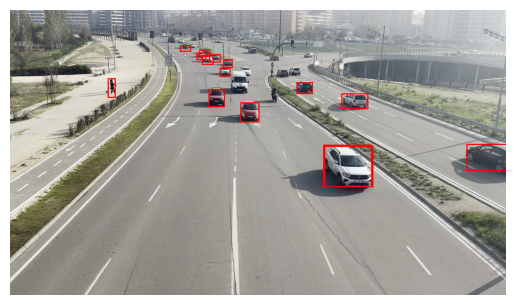

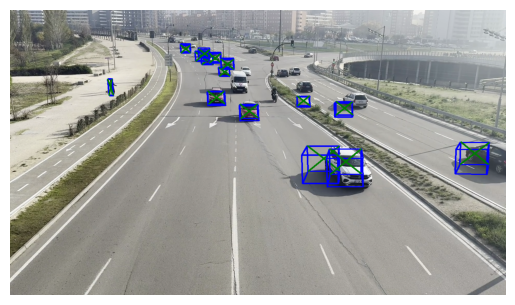

In [14]:
visualizer = Visualizer(calib=calib, pitch=0.22)

img = Image.open(img_path)
# Resize the image
img_resized = img.resize(cfg['dataset']['resolution'], Image.Resampling.LANCZOS)

# Draw 2D bounding boxes on the image
image_with_2d = visualizer.draw_2d_bboxes(img_resized, results, color='red', width=3, display=True)

# Draw 3D bounding boxes on the image
image_with_3d = visualizer.draw_3d_bboxes(img_resized, results, color='blue', color_front='green', width=4, display=True)